## PHYS 249 F23 Assignment 4 $-$ Stirling's Approximation

### The Factorial Function

Remember that for positive integers, the factorial function factorial$(n)$ (written $n!$) is defined by:
$$0! = 1$$
$$n! = n(n-1)!\ {\rm for}\ n > 0.$$
This function can also be extended to negative numbers and non-integers - cf. PHYS363.

### Stirling's Approximation

An important result in statistics and combinatorics, statistical mechanics, and various other fields is *Stirling's Approximation*:

$$\ln(n!) \simeq n\ln n - n +O(\ln n)$$

Here the $O$ notation means something specific (and in fact I'm using it incorrectly...), but you can take it to mean "is no bigger than a constant multiple of" or something like that.

To clarify the underlying idea, we can rewrite Stirling's Approximation as:

$$\ln(n!) \simeq n(\ln n - 1) +O(\ln n).$$

As $n$ gets big, e.g. n = 1e10, $\ln n$ is much smaller ($\ln 1e10 \simeq 23$), so you can neglect the final term and just replace $\ln(n!)$ with $n(\ln n -1)$, or alternately write

$$n! \simeq \exp[n(\ln n -1)]$$ 

This greatly simplifies mathematical expressions involving factorials of large numbers.

In this assignment, we will demonstrate this result graphically.

**1)** First, write a user-defined function that returns the factorial of $n$. It should check that $n$ is a positive integer, and return an error message if it isn't. Also, it should return the correct value if $n = 0$. 

Note that while there are many prewritten codes/functions out there to calculate factorial, here I am asking you to do this *yourself*, using your own code.

In [9]:
def fact(n):
    if(n < 0 or n%1!=0):
        raise Exception("integer needs to be non-negative")
    
    if (n == 0 or n == 1):
        return 1
    
    return n*fact(n-1)

print(fact(4))
# print(fact(3.1))



24


**2)** Given your factorial code, try plotting $n!$ for $n = 0-20$, as a series of (unconnected) dots. 


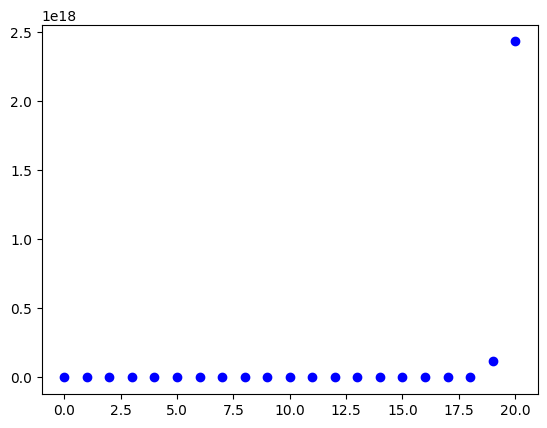

In [10]:
from numpy import linspace, array
from matplotlib import pyplot as plt

x = linspace(0, 20, 21)
y = array(list(map(fact, x)))
# print(x, y)
plt.plot(x,y, "bo")
plt.show()

**3)** Now make a log-linear plot (with a log scale on the vertical axis and a linear one on the horizontal axis), so the range is more reasonable. 

(Note as we said in class, "log" plots normally use log(base 10); here we actually want the natural log  - *math.log*, not *math.log10* - so as to demonstrate Stirling's Approximation below.)

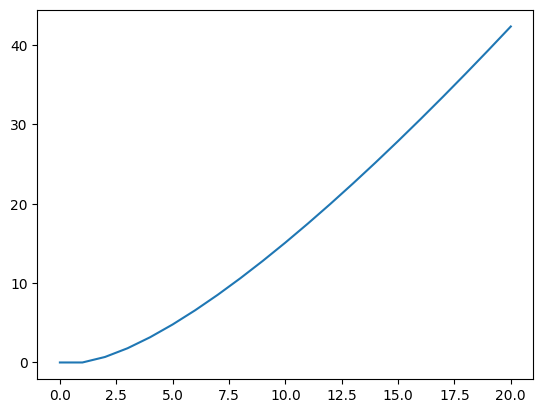

In [11]:
from numpy import log

y2 = log(y)
plt.plot(x, y2)
plt.show()

**4)** Now plot Stirling's approximation, i.e. $A(n) = n\ln n - n$, directly on the same (logged) plot and show that the two curves approach each other. 

*Hint:* Note that whereas you could use integers for $n!$, $A(n)$ will have to be a float. Also $\log(0)$ is not defined, so you will have to skip this index in setting the values of $A$, and in plotting it.

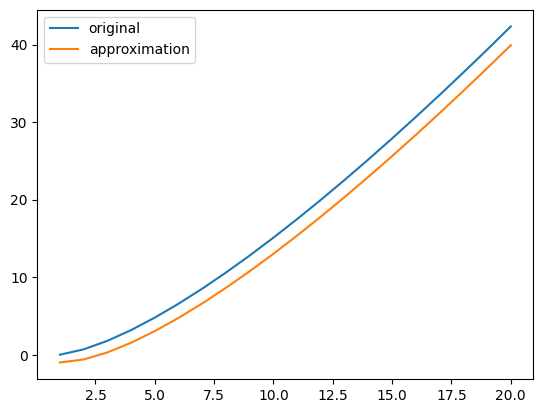

In [12]:
x = x[1:]
y2 = y2[1:]
A = x*log(x) - x

plt.plot(x, y2, label="original")
plt.plot(x, A, label="approximation")
plt.legend()
plt.show()

**5)** To make the latter point a bit more explicit, calculate the ratio $R(n) = \ln(n!)/A(n)$ versus n. 

(Here too, $R$ needs to be a float, and you need to skip $n = 0$.)

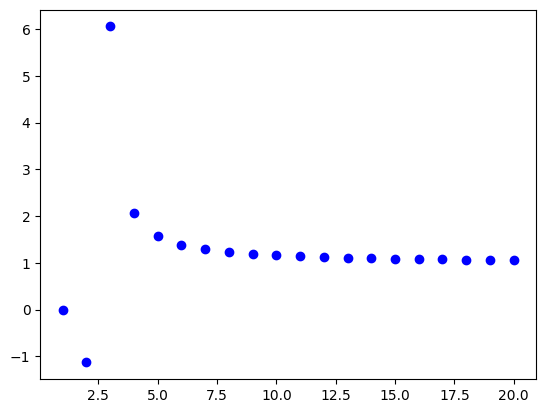

In [13]:
R = y2/A

plt.plot(x, R, "bo")
plt.show()

**6)** Finally, calculate the difference $D(n) = \ln(n!) - A(N)$; then plot $D(n)/\ln n$ versus $n$, and see if you can understand the final term in the original expression. 

What is the mathematical relationship between $D(n)$ and $\ln n$? 

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.] [1.30685282 1.4959226  1.63287639 1.74030218 1.8286944  1.90379032
 1.96907057 2.02680628 2.07856164 2.12545985 2.1683347  2.20782221
 2.24441857 2.27851837 2.31044055 2.3404466  2.36875357 2.39554358
 2.42097099]


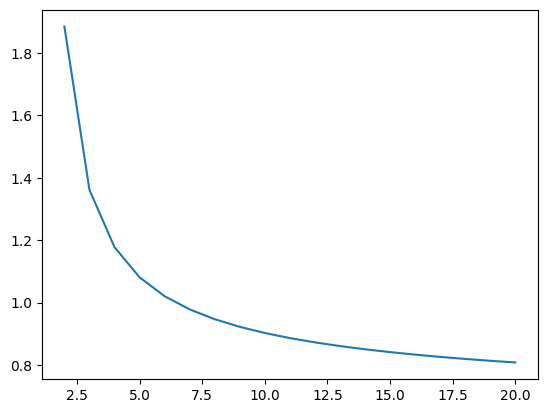

In [14]:
D = y2[1:] - A[1:]
print(x, D)
lD = D/log(x[1:])

plt.plot(x[1:], lD)
plt.show()